# 7. 人工神经网络基础

- 感知器
- 交叉熵损失计算函数
- 单层神经网络
- 多层神经网络
- ReLU函数
- 误差反向传播算法

## 7.1 感知器算法实现案例

### 1.任务描述

假设有4个样本，每个样本有2个特征。已知4个样本的特征为[0, 0], [0, 1], [1, 0], [1, 1]，4个样本对应的标签为-1, -1, -1, 1。


要求：
- 以样本的第一个特征为x轴，以样本的第二个特征为y轴，绘制4个样本的散点图，标签为1的样本绘制成红色星号（*），标签为-1的样本绘制成绿色加号（+）。观察散点图，确定样本是线性可分的。
- 使用感知器算法，找出一个向量W和一个常数b，使得其对于4个样本有：
  - 若$y_i = +1$，则$W^TX_i+b>0$
  - 若$y_i = -1$，则$W^TX_i+b<0$

    其中，$y_i$是第i个样本的标签，$X_i$是第i个样本的特征向量。
    
- 绘制初始的决策边界（红色实线）和最终的决策边界（绿色虚线）

### 2.知识准备

见教程。

### 3.任务分析

在训练过程中，可以使用分支结构来指定在不同情况下权值和偏移值的更新方式。

### 4.任务实施


执行代码

参数更新次数： 11
更新后的W： [2.49589878 0.95454587]
更新后的b： -2.856528370296921


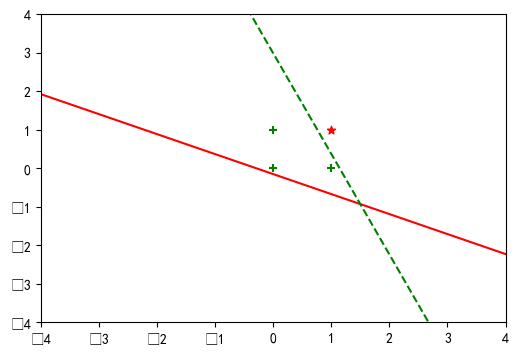

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# 1,样本数据
# 特征
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 标签
y = np.array([-1, -1, -1, 1])
# 2,绘制样本特征数据散点图，如果对应标签是-1，绘成绿色加号（+），如果对应标签为1，绘成红色星号（*）
fig=plt.figure(figsize=(6,4))
# 设置x轴数值显示范围
plt.xlim(-4,4)
# 设置y轴数值显示范围
plt.ylim(-4,4)
# 绘制
for index,item in enumerate(X):
    if y[index]==1:
        plt.scatter(item[0],item[1],c='r',marker='*')
    elif y[index]==-1:
        plt.scatter(item[0],item[1],c='g',marker='+')

# 3,初始化参数
# 学习率
lr=1
np.random.seed(612)
# 偏置
b=np.random.rand(1)[0]
# 权值矩阵
W=np.random.rand(2)

# print(W,b)
# 4，绘制初始直线（实线）W[0]*x1 + W[1]*x2 + b=0
# 生成x1轴数据
X1=np.linspace(-5,5,11)
# 计算x2轴数据
X2 = -(W[0]*X1 + b) / W[1]
plt.plot(X1,X2,'r-')
# 更新次数
updateNum=0
# 5,寻找决策边界
for epochs in range(5):
    for index,item in enumerate(X):
        # 计算预测值
        result=W[0]*item[0]+W[1]*item[1]+b
        # 如果预测值大于0，但对应的标签等于-1
        if result>0 and y[index]==-1:
            W[0] = W[0]-item[0]*lr
            W[1] = W[1]-item[1]*lr
            b = b-1*lr
            updateNum+=1
        # 如果预测值小于0，但对应的标签等于1
        elif result<0 and y[index]==1:
            W[0] = W[0]+item[0]*lr
            W[1] = W[1]+item[1]*lr
            b = b+1*lr
            updateNum+=1

print('参数更新次数：',updateNum)
print('更新后的W：',W)
print('更新后的b：',b)
            
# 绘制更新后的直线（虚线）
X2 = -(W[0]*X1 + b) / W[1]
plt.plot(X1,X2,'g--')
plt.show()